# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pickle

# Importing Dataset

In [2]:
dataset = pd.read_csv("Dataset/diabetes.csv")

# EDA

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies      768 non-null int64
Glucose          768 non-null int64
BloodPressure    768 non-null int64
SkinThickness    768 non-null int64
Insulin          768 non-null int64
BMI              768 non-null float64
Pedigree         768 non-null float64
Age              768 non-null int64
Outcome          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
dataset.shape

(768, 9)

# Data visualization

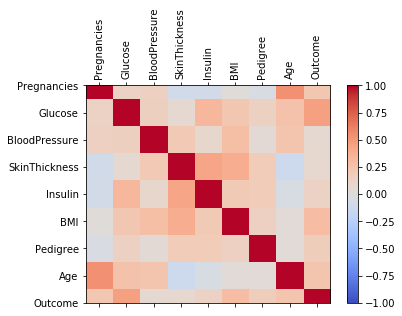

In [8]:
corr = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()

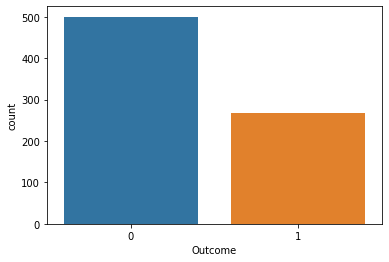

In [9]:
sns.countplot(x = 'Outcome',data = dataset)

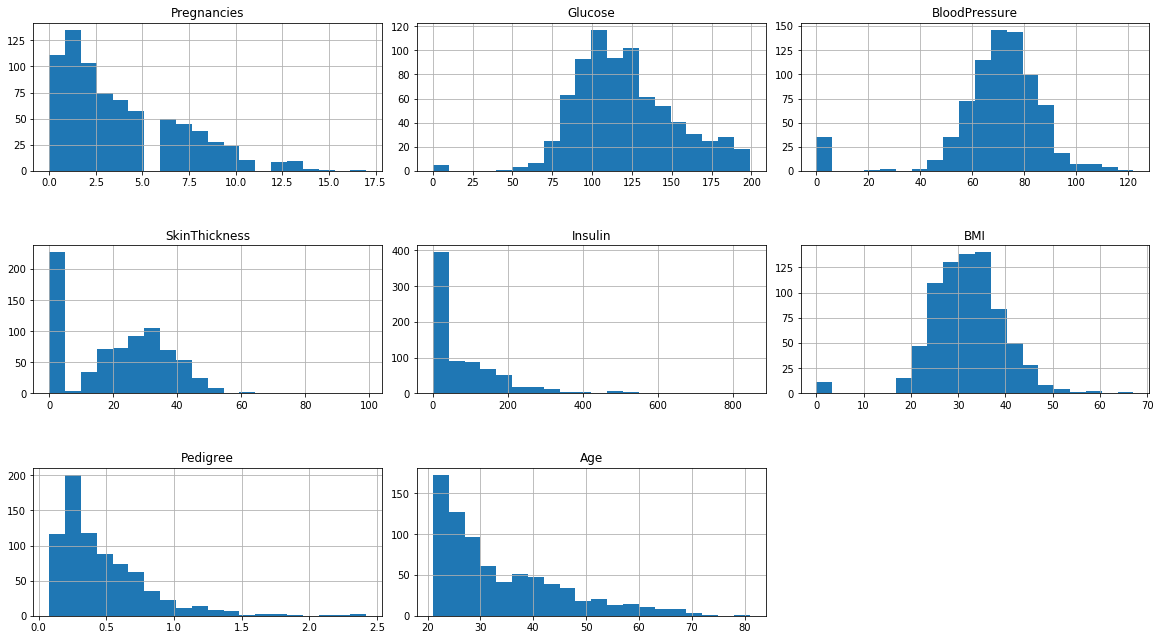

In [10]:
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

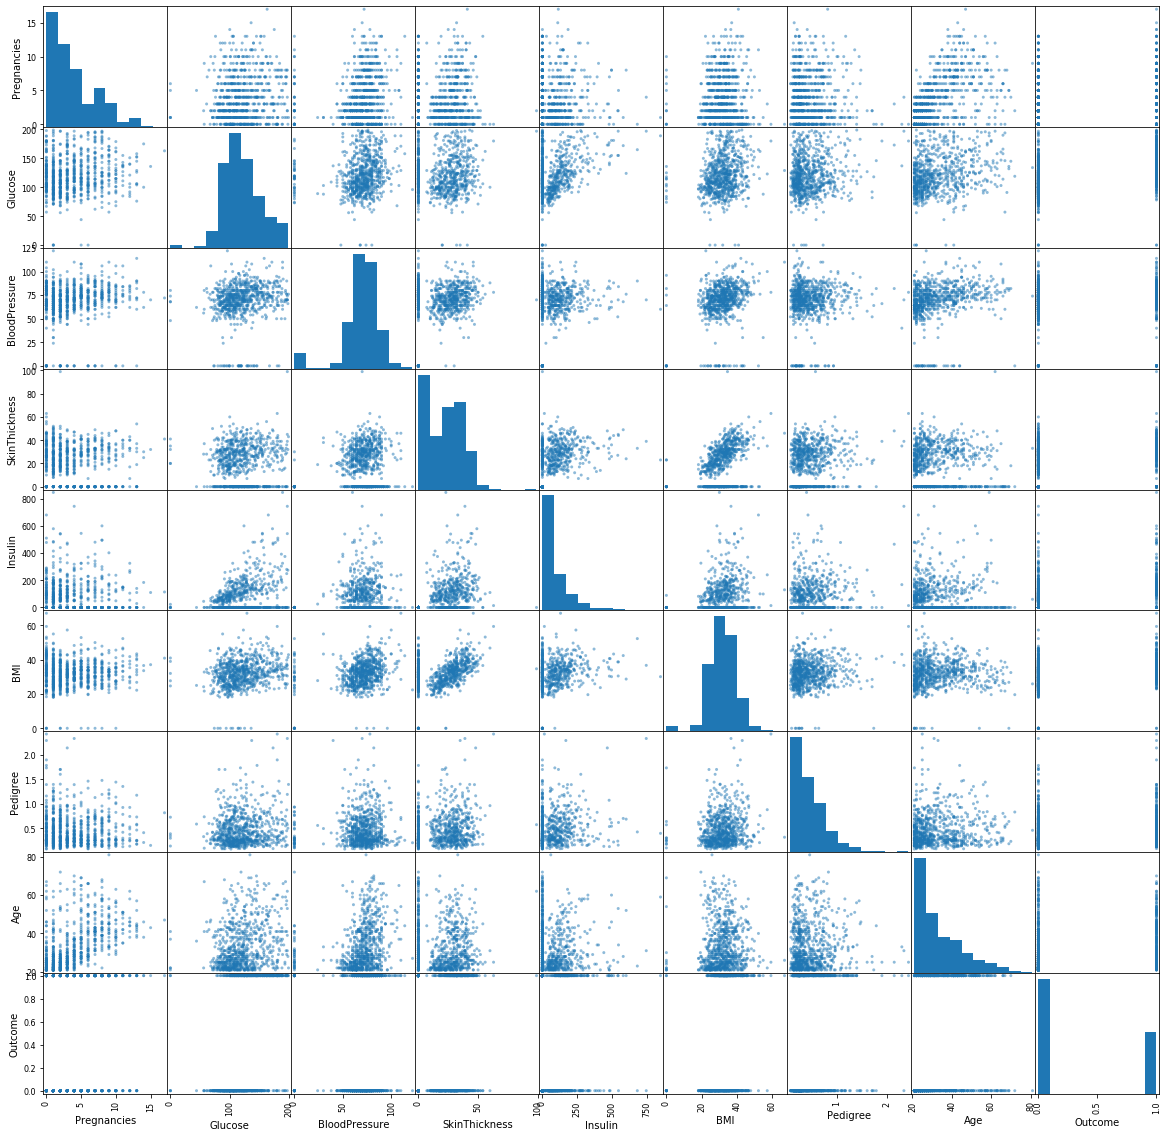

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

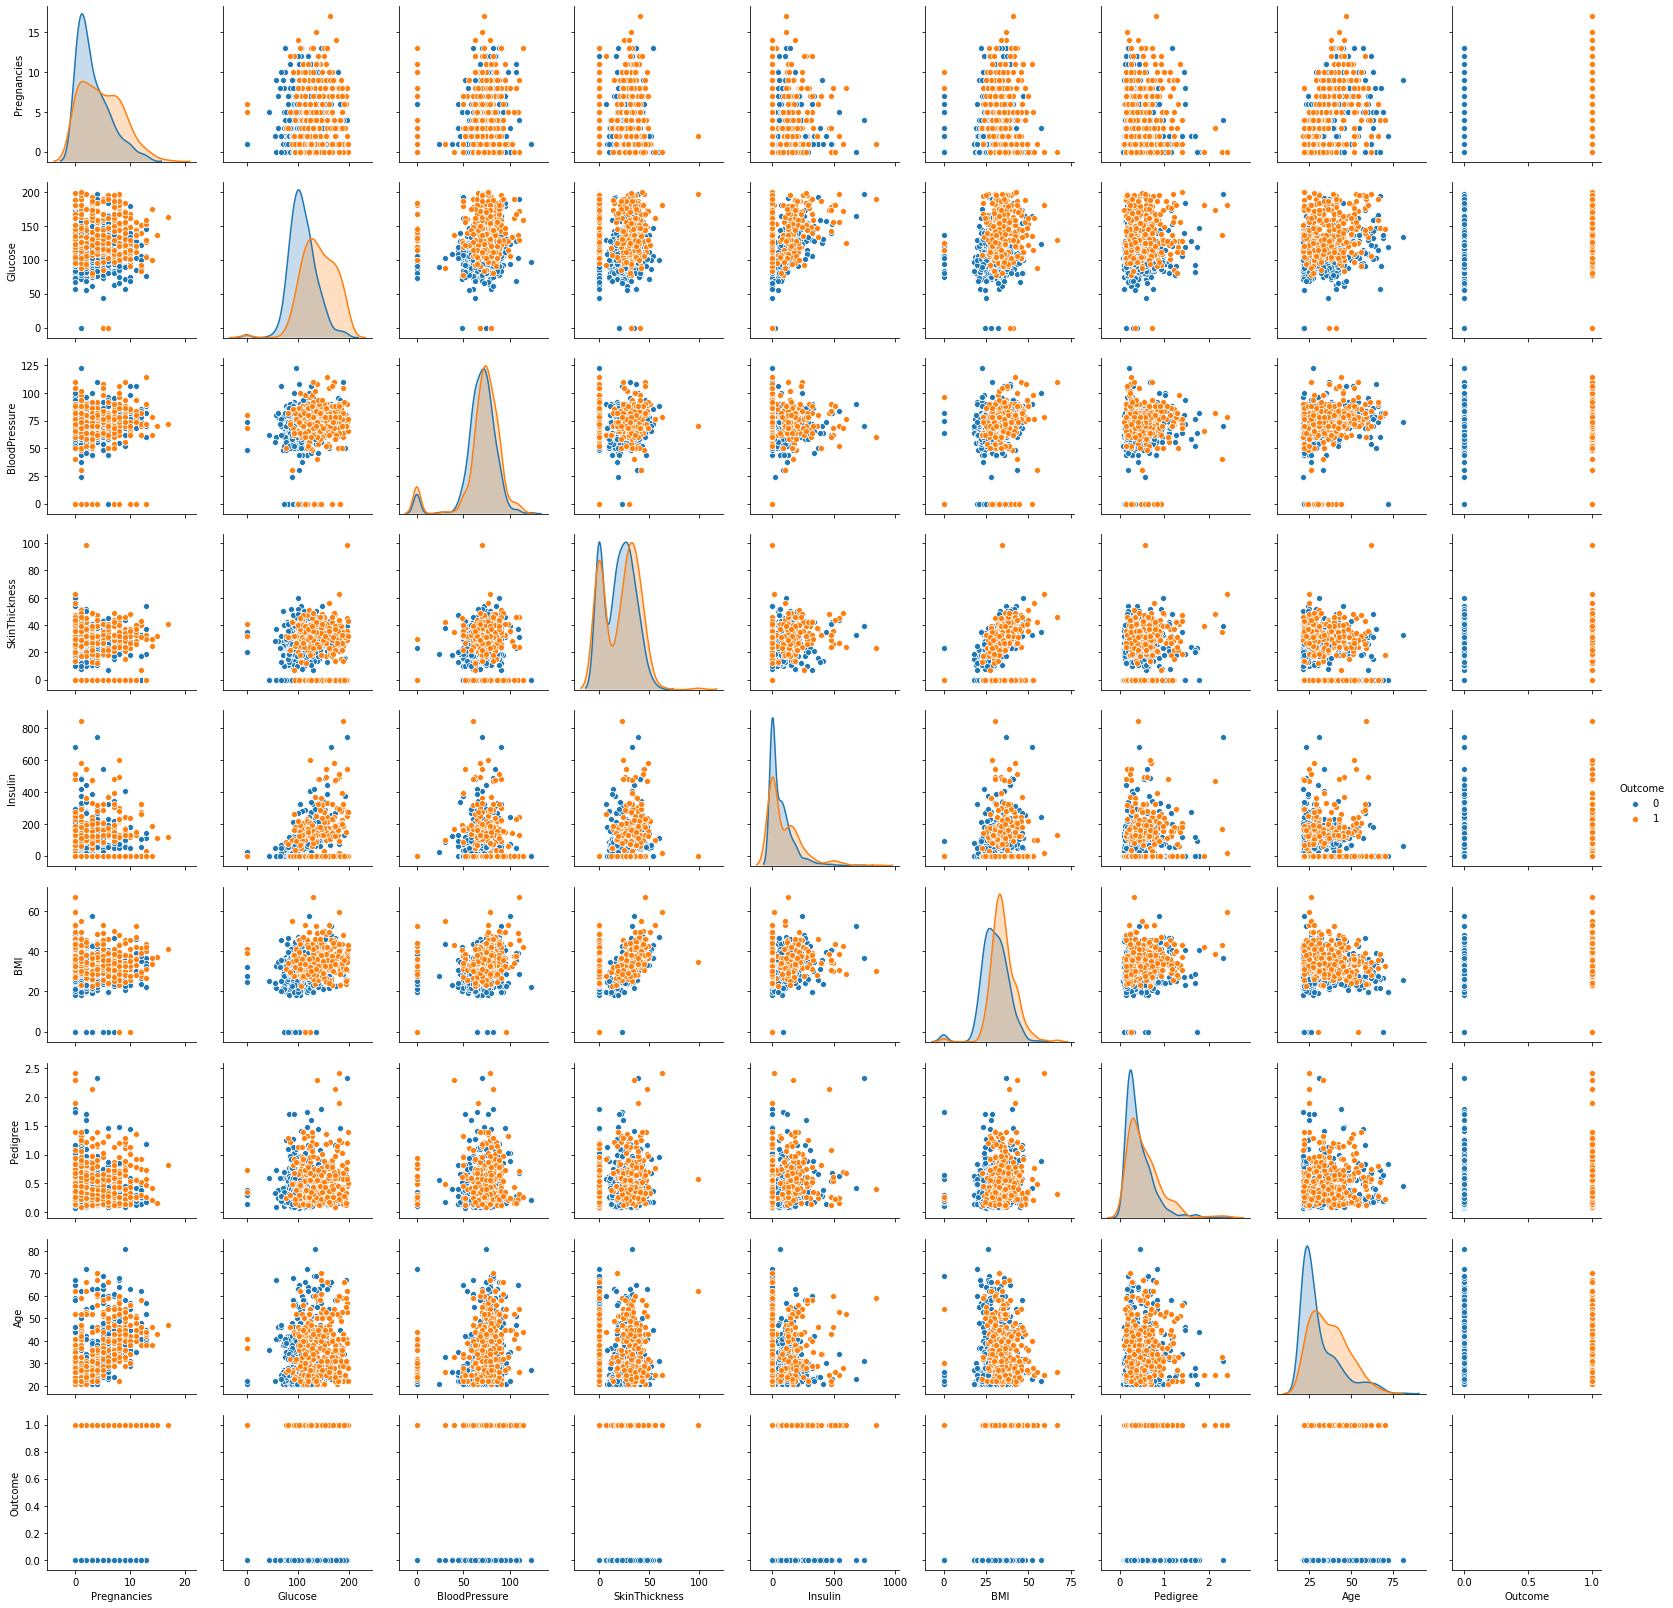

In [12]:
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

# Model Building

In [13]:
X = dataset.drop(columns=['Outcome', 'Insulin'])

In [14]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Pedigree,Age
0,6,148,72,35,33.6,0.627,50
1,1,85,66,29,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,23,28.1,0.167,21
4,0,137,40,35,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63
764,2,122,70,27,36.8,0.340,27
765,5,121,72,23,26.2,0.245,30
766,1,126,60,0,30.1,0.349,47


In [15]:
y = dataset['Outcome']

In [16]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

# Logistic Regression 

In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X, y)

LogisticRegression(random_state=0)

In [20]:
evaluate(LR, X, X_test, y, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[442  58]
 [113 155]]
ACCURACY SCORE:
0.7773
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.796396    0.727700  0.777344    0.762048      0.772424
recall       0.884000    0.578358  0.777344    0.731179      0.777344
f1-score     0.837915    0.644491  0.777344    0.741203      0.770418
support    500.000000  268.000000  0.777344  768.000000    768.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[143  13]
 [ 27  48]]
ACCURACY SCORE:
0.8268
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.841176   0.786885   0.82684    0.814031      0.823549
recall       0.916667   0.640000   0.82684    0.778333      0.826840
f1-score     0.877301   0.705882   0.82684    0.791591      0.821645
support    156.000000  75.000000   0.82684  231.000000    231.000000


# Decision Tree

In [21]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

In [22]:
evaluate(dt, X, X_test, y, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[500   0]
 [  0 268]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    500.0  268.0       1.0      768.0         768.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[156   0]
 [  0  75]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    156.0  75.0       1.0      231.0         231.0


# Gradient Boosting 

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GB.fit(X, y)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [24]:
evaluate(GB, X, X_test, y, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[451  49]
 [ 69 199]]
ACCURACY SCORE:
0.8464
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.867308    0.802419  0.846354    0.834864      0.844664
recall       0.902000    0.742537  0.846354    0.822269      0.846354
f1-score     0.884314    0.771318  0.846354    0.827816      0.844883
support    500.000000  268.000000  0.846354  768.000000    768.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[143  13]
 [ 17  58]]
ACCURACY SCORE:
0.8701
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.893750   0.816901   0.87013    0.855326      0.868799
recall       0.916667   0.773333   0.87013    0.845000      0.870130
f1-score     0.905063   0.794521   0.87013    0.849792      0.869173
support    156.000000  75.000000   0.87013  231.000000    231.000000


In [25]:
pickle.dump(dt, open('model1.pkl', 'wb'))

In [26]:
s = np.array([6,148,72,35,33.69,0.369,70])
print(s.shape)
s = s.reshape(1,-1)
print(s.shape)

(7,)
(1, 7)


In [27]:
model = pickle.load(open('model1.pkl', 'rb'))
print(model.predict(s))

[0]


# Insulin

In [28]:
insulin = dataset

In [29]:
df = insulin[insulin.Insulin != 0]

In [30]:
print(df.corr()["Insulin"].abs().sort_values(ascending=False))

Insulin          1.000000
Glucose          0.580010
Outcome          0.303454
BMI              0.228328
Age              0.220261
SkinThickness    0.184888
Pedigree         0.130395
BloodPressure    0.098272
Pregnancies      0.082171
Name: Insulin, dtype: float64


In [31]:
X = df[['Age','Glucose']]

In [32]:
X

,Age,Glucose
3,21,89
4,33,137
6,26,78
8,53,197
13,59,189
...,...,...
753,26,181
755,37,128
760,22,88
763,63,101


In [33]:
y = df.Insulin

In [34]:
y

3       94
4      168
6       88
8      543
13     846
      ... 
753    510
755    110
760     16
763    180
765    112
Name: Insulin, Length: 394, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [36]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
pickle.dump(dt, open('model2.pkl', 'wb'))